# Importing the libraries

In [ ]:
!pip install category_encoders

In [ ]:
pip install en

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings   
warnings.filterwarnings("ignore")
import category_encoders as ce

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset from Bigquery & selecting Features

In [3]:
df_raw=pd.read_csv('gs://pak/Edited CSV/ModifiedFlightDataset.csv')
df_airport=pd.read_csv('gs://pak/Original CSV/AirportCodeLocationLookupClean.csv')

In [4]:
df_raw.shape

(2133152, 21)

In [5]:
df_airport.shape

(6172, 5)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133152 entries, 0 to 2133151
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              object 
 3   DayofMonth         int64  
 4   DayOfWeek          object 
 5   Carrier            object 
 6   DepDel15           int64  
 7   ArrDel15           int64  
 8   Cancelled          int64  
 9   OriginAirportCode  object 
 10  DestAirportCode    object 
 11  DepTimeRange       object 
 12  CRSDepHour         int64  
 13  OriginLatitude     float64
 14  OriginLongitude    float64
 15  SkyCondition       object 
 16  Visibility         float64
 17  DewPointFarenheit  float64
 18  WindSpeed          float64
 19  SeaLevelPressure   float64
 20  HourlyPrecip       int64  
dtypes: float64(6), int64(8), object(7)
memory usage: 341.8+ MB


In [7]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AIRPORT_ID            6172 non-null   int64  
 1   AIRPORT               6172 non-null   object 
 2   DISPLAY_AIRPORT_NAME  6172 non-null   object 
 3   LATITUDE              6171 non-null   float64
 4   LONGITUDE             6171 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 241.2+ KB


In [8]:
df_raw=df_raw.drop(['OriginLatitude','OriginLongitude'],axis=1)

In [9]:
new_df=pd.merge(df_raw,df_airport,how='inner',left_on='OriginAirportCode',right_on='AIRPORT')

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133152 entries, 0 to 2133151
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Year                  int64  
 2   Month                 object 
 3   DayofMonth            int64  
 4   DayOfWeek             object 
 5   Carrier               object 
 6   DepDel15              int64  
 7   ArrDel15              int64  
 8   Cancelled             int64  
 9   OriginAirportCode     object 
 10  DestAirportCode       object 
 11  DepTimeRange          object 
 12  CRSDepHour            int64  
 13  SkyCondition          object 
 14  Visibility            float64
 15  DewPointFarenheit     float64
 16  WindSpeed             float64
 17  SeaLevelPressure      float64
 18  HourlyPrecip          int64  
 19  AIRPORT_ID            int64  
 20  AIRPORT               object 
 21  DISPLAY_AIRPORT_NAME  object 
 22  LATITUDE              float64
 23  LONGITU

In [11]:
new_df=new_df.drop(['AIRPORT','AIRPORT_ID','DISPLAY_AIRPORT_NAME'],axis=1)
new_df.rename({'LATITUDE':'OriginLatitude','LONGITUDE':'OriginLongitude'},axis=1,inplace=True)

In [12]:
new_df1=pd.merge(df_airport,new_df,how='inner',right_on='DestAirportCode',left_on='AIRPORT')

In [13]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133152 entries, 0 to 2133151
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   AIRPORT_ID            int64  
 1   AIRPORT               object 
 2   DISPLAY_AIRPORT_NAME  object 
 3   LATITUDE              float64
 4   LONGITUDE             float64
 5   Unnamed: 0            int64  
 6   Year                  int64  
 7   Month                 object 
 8   DayofMonth            int64  
 9   DayOfWeek             object 
 10  Carrier               object 
 11  DepDel15              int64  
 12  ArrDel15              int64  
 13  Cancelled             int64  
 14  OriginAirportCode     object 
 15  DestAirportCode       object 
 16  DepTimeRange          object 
 17  CRSDepHour            int64  
 18  SkyCondition          object 
 19  Visibility            float64
 20  DewPointFarenheit     float64
 21  WindSpeed             float64
 22  SeaLevelPressure      float64
 23  HourlyP

In [14]:
new_df1.rename({'LATITUDE':'DestLatitude','LONGITUDE':'DestLongitude'},axis=1,inplace=True)

In [15]:
new_df1=new_df1.drop(['AIRPORT','AIRPORT_ID','DISPLAY_AIRPORT_NAME'],axis=1)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133152 entries, 0 to 2133151
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DestLatitude       float64
 1   DestLongitude      float64
 2   Unnamed: 0         int64  
 3   Year               int64  
 4   Month              object 
 5   DayofMonth         int64  
 6   DayOfWeek          object 
 7   Carrier            object 
 8   DepDel15           int64  
 9   ArrDel15           int64  
 10  Cancelled          int64  
 11  OriginAirportCode  object 
 12  DestAirportCode    object 
 13  DepTimeRange       object 
 14  CRSDepHour         int64  
 15  SkyCondition       object 
 16  Visibility         float64
 17  DewPointFarenheit  float64
 18  WindSpeed          float64
 19  SeaLevelPressure   float64
 20  HourlyPrecip       int64  
 21  OriginLatitude     float64
 22  OriginLongitude    float64
dtypes: float64(8), int64(8), object(7)
memory usage: 390.6+ MB


In [16]:
train_columns = ["OriginLatitude","OriginLongitude","Month","Carrier","DepDel15","DayofMonth","DayOfWeek","CRSDepHour","DestLatitude","DestLongitude","WindSpeed","SeaLevelPressure","HourlyPrecip"]
ml_df = new_df1[train_columns]
ml_df.shape

(2133152, 13)

In [17]:
ml_df.head()

,OriginLatitude,OriginLongitude,Month,Carrier,DepDel15,DayofMonth,DayOfWeek,CRSDepHour,DestLatitude,DestLongitude,WindSpeed,SeaLevelPressure,HourlyPrecip
0,40.788333,-111.977778,April,OO,0,20,Saturday,9,35.038889,-106.608333,0.0,30.08,1
1,40.788333,-111.977778,April,OO,0,18,Thursday,15,35.038889,-106.608333,0.0,30.27,0
2,40.788333,-111.977778,April,OO,0,18,Thursday,21,35.038889,-106.608333,8.0,30.26,0
3,40.788333,-111.977778,April,OO,0,18,Thursday,9,35.038889,-106.608333,10.0,30.29,0
4,40.788333,-111.977778,April,OO,0,19,Friday,9,35.038889,-106.608333,11.0,30.18,0


In [18]:
#To remove duplicates
ml_df = ml_df.drop_duplicates(keep=False)

In [19]:
ml_df.shape

(2095000, 13)

In [20]:
##Treating Data Imbalancing

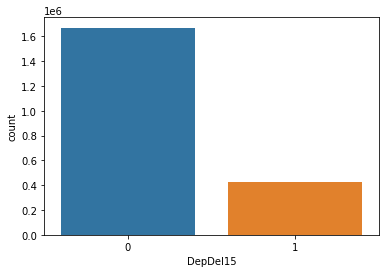

In [21]:
# visualize the target variable
g = sns.countplot(ml_df['DepDel15'])
#g.set_xticklabels(['Delayed','Not Delayed'])
plt.show()

In [22]:
#To deal with data imbalancing : Undersampling
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [23]:
ml_df1=ml_df.copy()
ml_df=downsample(ml_df,'DepDel15')

In [24]:
ml_df.shape

(848522, 13)

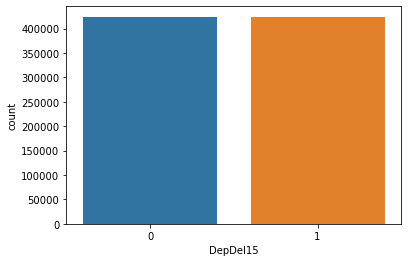

In [25]:
# visualize the target variable
g = sns.countplot(ml_df['DepDel15'])
#g.set_xticklabels(['Delayed','Not Delayed'])
plt.show()

# Normalize the data

In [26]:
print(ml_df['Month'].unique())
print(len(ml_df['Month'].unique()))

['May' 'September' 'October' 'April' 'July' 'August' 'June']
7


trip_days_cat = ml_df.Month.astype('category')
cat_dict = dict(enumerate(trip_days_cat.cat.categories))
print(cat_dict)

In [27]:
ml_df = pd.get_dummies(ml_df, columns = ['Month'])
ml_df.head(5)

,OriginLatitude,OriginLongitude,Carrier,DepDel15,DayofMonth,DayOfWeek,CRSDepHour,DestLatitude,DestLongitude,WindSpeed,SeaLevelPressure,HourlyPrecip,Month_April,Month_August,Month_July,Month_June,Month_May,Month_October,Month_September
0,41.979444,-87.907500,UA,0,16,Thursday,21,38.947500,-77.460000,3.0,29.96,0,0,0,0,0,1,0,0
1,39.996944,-82.892222,DL,0,24,Friday,7,33.636667,-84.427778,16.0,30.24,0,0,0,0,0,1,0,0
2,26.071667,-80.149722,WN,0,14,Saturday,12,29.993333,-90.259167,8.0,29.91,0,0,0,0,0,0,0,1
3,33.942500,-118.408056,AA,0,29,Tuesday,23,41.939167,-72.683333,0.0,30.00,0,0,0,0,0,0,1,0
4,38.851389,-77.037778,EV,0,14,Sunday,18,40.692500,-74.168611,5.0,30.10,0,1,0,0,0,0,0,0


ml_df['OriginAirportCode'] = ml_df['OriginAirportCode'].astype('category')
ml_df['OriginAirportCode'] = ml_df['OriginAirportCode'].cat.codes
ml_df.head(5)

In [28]:
print(ml_df['Carrier'].unique())
print(len(ml_df['Carrier'].unique()))

['UA' 'DL' 'WN' 'AA' 'EV' 'YV' 'OO' 'FL' 'AS' 'US' 'VX' 'B6' '9E' 'MQ'
 'HA' 'F9']
16


encoder= ce.BinaryEncoder(cols=['Carrier'],return_df=True)
ml_df = encoder.fit_transform(ml_df)
ml_df.head()

#ml_df = pd.get_dummies(ml_df, columns = ['Carrier'])
ml_df['Carrier'] = ml_df['Carrier'].astype('category')
ml_df['Carrier'] = ml_df['Carrier'].cat.codes
ml_df.head(5)

In [29]:
encoder= ce.BinaryEncoder(cols=['Carrier'],return_df=True)
ml_df = encoder.fit_transform(ml_df)
ml_df.head()

,OriginLatitude,OriginLongitude,Carrier_0,Carrier_1,Carrier_2,Carrier_3,Carrier_4,DepDel15,DayofMonth,DayOfWeek,...,WindSpeed,SeaLevelPressure,HourlyPrecip,Month_April,Month_August,Month_July,Month_June,Month_May,Month_October,Month_September
0,41.979444,-87.907500,0,0,0,0,1,0,16,Thursday,...,3.0,29.96,0,0,0,0,0,1,0,0
1,39.996944,-82.892222,0,0,0,1,0,0,24,Friday,...,16.0,30.24,0,0,0,0,0,1,0,0
2,26.071667,-80.149722,0,0,0,1,1,0,14,Saturday,...,8.0,29.91,0,0,0,0,0,0,0,1
3,33.942500,-118.408056,0,0,1,0,0,0,29,Tuesday,...,0.0,30.00,0,0,0,0,0,0,1,0
4,38.851389,-77.037778,0,0,1,0,1,0,14,Sunday,...,5.0,30.10,0,1,0,0,0,0,0,0


In [30]:
print(ml_df['DayOfWeek'].unique())
print(len(ml_df['DayOfWeek'].unique()))

['Thursday' 'Friday' 'Saturday' 'Tuesday' 'Sunday' 'Monday' 'Wednesday']
7


In [31]:
#ml_df = pd.get_dummies(ml_df, columns = ['DayOfWeek'])
ml_df['DayOfWeek'] = ml_df['DayOfWeek'].astype('category')
ml_df['DayOfWeek'] = ml_df['DayOfWeek'].cat.codes
ml_df.head(5)

,OriginLatitude,OriginLongitude,Carrier_0,Carrier_1,Carrier_2,Carrier_3,Carrier_4,DepDel15,DayofMonth,DayOfWeek,...,WindSpeed,SeaLevelPressure,HourlyPrecip,Month_April,Month_August,Month_July,Month_June,Month_May,Month_October,Month_September
0,41.979444,-87.907500,0,0,0,0,1,0,16,4,...,3.0,29.96,0,0,0,0,0,1,0,0
1,39.996944,-82.892222,0,0,0,1,0,0,24,0,...,16.0,30.24,0,0,0,0,0,1,0,0
2,26.071667,-80.149722,0,0,0,1,1,0,14,2,...,8.0,29.91,0,0,0,0,0,0,0,1
3,33.942500,-118.408056,0,0,1,0,0,0,29,5,...,0.0,30.00,0,0,0,0,0,0,1,0
4,38.851389,-77.037778,0,0,1,0,1,0,14,3,...,5.0,30.10,0,1,0,0,0,0,0,0


In [32]:
print(ml_df['CRSDepHour'].unique())
print(len(ml_df['CRSDepHour'].unique()))

[21  7 12 23 18 17  8  6 16 10 14 15  9 11 20  5 13 19 22  0  1  3  2  4]
24


In [33]:
ml_df = pd.get_dummies(ml_df, columns = ['CRSDepHour'])
ml_df.head(5)

,OriginLatitude,OriginLongitude,Carrier_0,Carrier_1,Carrier_2,Carrier_3,Carrier_4,DepDel15,DayofMonth,DayOfWeek,...,CRSDepHour_14,CRSDepHour_15,CRSDepHour_16,CRSDepHour_17,CRSDepHour_18,CRSDepHour_19,CRSDepHour_20,CRSDepHour_21,CRSDepHour_22,CRSDepHour_23
0,41.979444,-87.907500,0,0,0,0,1,0,16,4,...,0,0,0,0,0,0,0,1,0,0
1,39.996944,-82.892222,0,0,0,1,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
2,26.071667,-80.149722,0,0,0,1,1,0,14,2,...,0,0,0,0,0,0,0,0,0,0
3,33.942500,-118.408056,0,0,1,0,0,0,29,5,...,0,0,0,0,0,0,0,0,0,1
4,38.851389,-77.037778,0,0,1,0,1,0,14,3,...,0,0,0,0,1,0,0,0,0,0


In [34]:
columns_for_normalization = ["SeaLevelPressure","WindSpeed"]
for i in columns_for_normalization:
  ml_df[i] = (ml_df[i] - ml_df[i].min()) / (ml_df[i].max() - ml_df[i].min())

In [35]:
ml_df.head()

,OriginLatitude,OriginLongitude,Carrier_0,Carrier_1,Carrier_2,Carrier_3,Carrier_4,DepDel15,DayofMonth,DayOfWeek,...,CRSDepHour_14,CRSDepHour_15,CRSDepHour_16,CRSDepHour_17,CRSDepHour_18,CRSDepHour_19,CRSDepHour_20,CRSDepHour_21,CRSDepHour_22,CRSDepHour_23
0,41.979444,-87.907500,0,0,0,0,1,0,16,4,...,0,0,0,0,0,0,0,1,0,0
1,39.996944,-82.892222,0,0,0,1,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
2,26.071667,-80.149722,0,0,0,1,1,0,14,2,...,0,0,0,0,0,0,0,0,0,0
3,33.942500,-118.408056,0,0,1,0,0,0,29,5,...,0,0,0,0,0,0,0,0,0,1
4,38.851389,-77.037778,0,0,1,0,1,0,14,3,...,0,0,0,0,1,0,0,0,0,0


In [36]:
latitude_columns = ["OriginLatitude","DestLatitude"]
for i in latitude_columns:
  ml_df[i] = (ml_df[i] - (-90)) / (90 - (-90))

In [37]:
longitude_columns = ["OriginLongitude","DestLongitude"]
for i in longitude_columns:
  ml_df[i] = (ml_df[i] - (-180)) / (180 - (-180))

In [38]:
#ml_df['DayofMonth'] = (ml_df['DayofMonth'] - (1)) / (31 - (1))

In [39]:
#ml_df['CRSDepHour'] = (ml_df['CRSDepHour'] - (0)) / (24 - (0))

In [40]:
ml_df.head()

,OriginLatitude,OriginLongitude,Carrier_0,Carrier_1,Carrier_2,Carrier_3,Carrier_4,DepDel15,DayofMonth,DayOfWeek,...,CRSDepHour_14,CRSDepHour_15,CRSDepHour_16,CRSDepHour_17,CRSDepHour_18,CRSDepHour_19,CRSDepHour_20,CRSDepHour_21,CRSDepHour_22,CRSDepHour_23
0,0.733219,0.255812,0,0,0,0,1,0,16,4,...,0,0,0,0,0,0,0,1,0,0
1,0.722205,0.269744,0,0,0,1,0,0,24,0,...,0,0,0,0,0,0,0,0,0,0
2,0.644843,0.277362,0,0,0,1,1,0,14,2,...,0,0,0,0,0,0,0,0,0,0
3,0.688569,0.171089,0,0,1,0,0,0,29,5,...,0,0,0,0,0,0,0,0,0,1
4,0.715841,0.286006,0,0,1,0,1,0,14,3,...,0,0,0,0,1,0,0,0,0,0


# Train & Evaluate the ML Model

In [41]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848522 entries, 0 to 848521
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OriginLatitude    848522 non-null  float64
 1   OriginLongitude   848522 non-null  float64
 2   Carrier_0         848522 non-null  int64  
 3   Carrier_1         848522 non-null  int64  
 4   Carrier_2         848522 non-null  int64  
 5   Carrier_3         848522 non-null  int64  
 6   Carrier_4         848522 non-null  int64  
 7   DepDel15          848522 non-null  int64  
 8   DayofMonth        848522 non-null  int64  
 9   DayOfWeek         848522 non-null  int8   
 10  DestLatitude      848522 non-null  float64
 11  DestLongitude     848522 non-null  float64
 12  WindSpeed         848522 non-null  float64
 13  SeaLevelPressure  848522 non-null  float64
 14  HourlyPrecip      848522 non-null  int64  
 15  Month_April       848522 non-null  uint8  
 16  Month_August      84

In [42]:
X = ml_df.copy()
X=X.drop(['DepDel15'],axis=1)
Z=X.copy()
y = ml_df["DepDel15"]

X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Random Forest Classifier

In [1]:
#from sklearn import preprocessing
#from xgboost import XGBClassifier
#import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, roc_auc_score
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestClassifier()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

In [47]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestClassifier(n_estimators=200, min_samples_leaf=2)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [48]:
y_forest = Forest.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_forest))
print("Precision:",metrics.precision_score(y_test, y_forest))
print("Recall:",metrics.recall_score(y_test, y_forest))

Accuracy: 0.688164388986051
Precision: 0.6882873857611357
Recall: 0.6870795792254352


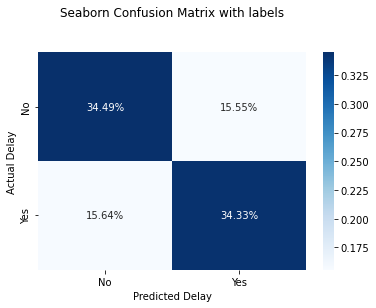

Coefficient of determination (R^2): -0.247
ROC AUC Score (ROC_AUC) : 0.755
Model Score/Performance on Testing data 0.688164388986051
Model Score/Performance on Training data 0.9377112498448281
Accuracy: 0.688164388986051
Precision: 0.6882873857611357
Recall: 0.6870795792254352


In [50]:
# Model evaluation
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_forest)
ax = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Delay')
ax.set_ylabel('Actual Delay');
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])
plt.show()

print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_forest))

rf_forest_prob = Forest.predict_proba(X_test)
rf_forest_prob = rf_forest_prob[:,1]
print('ROC AUC Score (ROC_AUC) : %.3f'% roc_auc_score(y_test, rf_forest_prob))

testing_data_model_score = Forest.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = Forest.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score) 

print("Accuracy:",metrics.accuracy_score(y_test, y_forest))
print("Precision:",metrics.precision_score(y_test, y_forest))
print("Recall:",metrics.recall_score(y_test, y_forest))

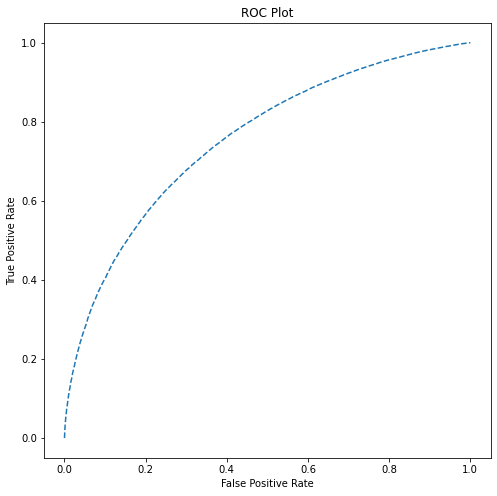

In [51]:
# calculating the ROC Curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rf_forest_prob)
plt.figure(figsize=(8,8))
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label='RandomForestClassifier' % roc_auc_score(y_test, rf_forest_prob))
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

[7.59291167e-02 8.03695387e-02 7.06198000e-04 1.49812937e-02
 1.84702847e-02 1.61071017e-02 1.59956929e-02 1.04150902e-01
 6.51094101e-02 9.03385934e-02 9.31701949e-02 8.74042789e-02
 1.18069242e-01 7.30836475e-03 8.20448223e-03 8.14065346e-03
 1.01715538e-02 9.67399732e-03 7.95474741e-03 9.13147345e-03
 8.92636444e-03 3.00646805e-04 1.44788595e-04 2.33225709e-05
 2.19085369e-05 1.50430115e-05 3.74092038e-03 2.58265986e-02
 2.06491568e-02 1.36053929e-02 8.00243775e-03 6.44860142e-03
 5.95326778e-03 5.62464463e-03 5.78613489e-03 5.48223749e-03
 5.76580545e-03 5.80219186e-03 6.52948995e-03 7.09553907e-03
 7.74046583e-03 6.44523268e-03 5.22077168e-03 2.42190591e-03
 1.04001111e-03]


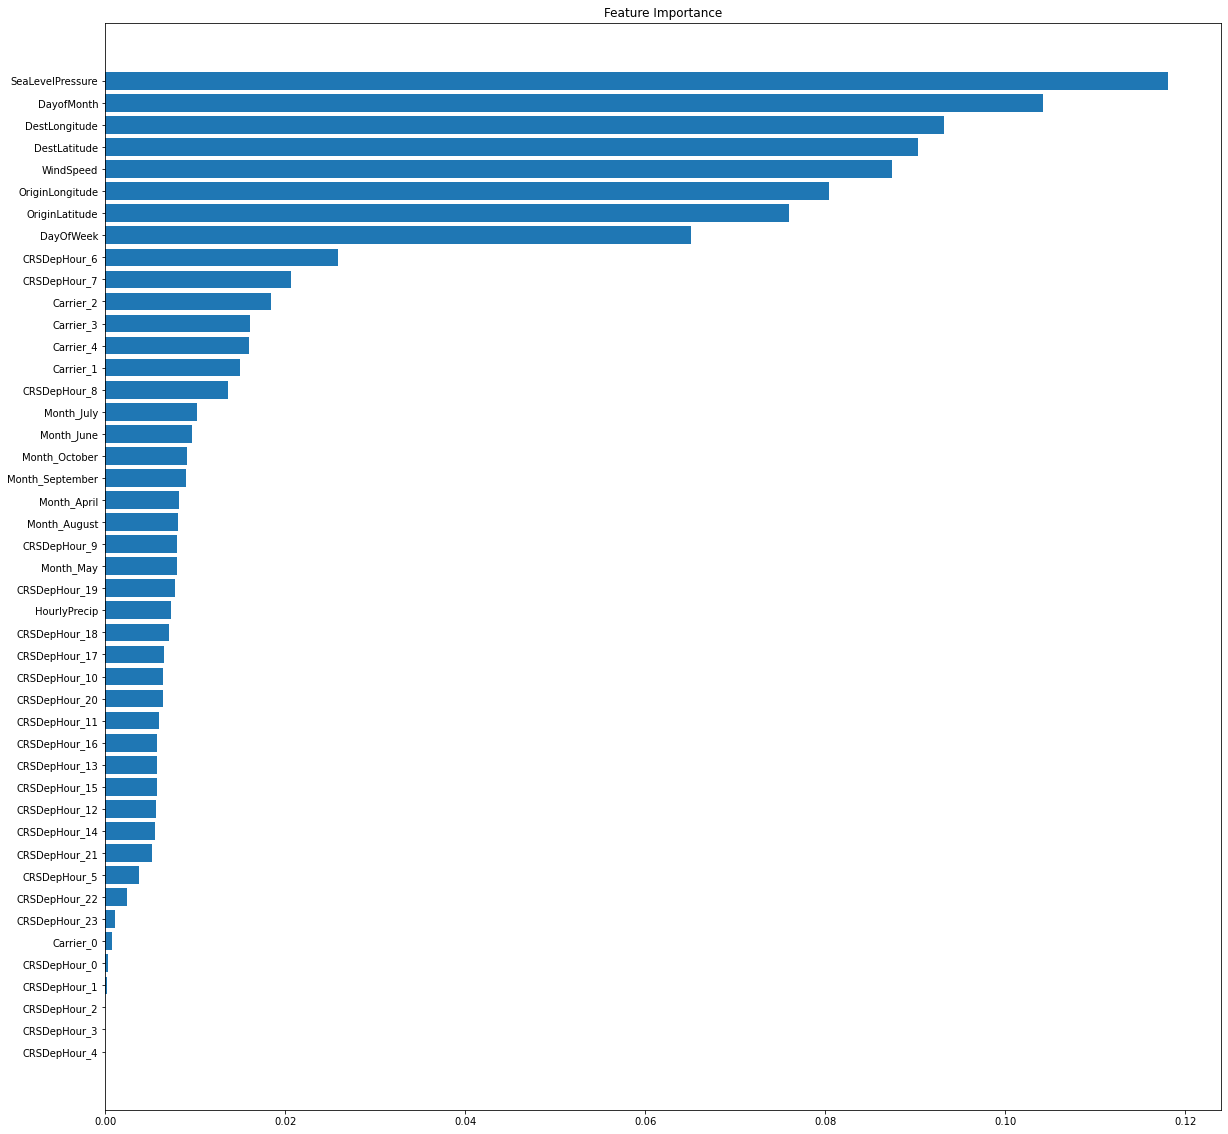

In [52]:
# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [Z.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,20))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig(' Forest feature importance')
plt.show()# Make predictions

In [62]:
#the predicted values
y_pred = Forest.predict(X_test)
data = pd.DataFrame(data={"Predicted Delay": y_pred.flatten()})
data

,Predicted Delay
0,0
1,1
2,0
3,0
4,0
...,...
212126,1
212127,0
212128,0
212129,1


In [66]:
#Comparing the predicted values and actual values
df = pd.DataFrame(data={'Predicted Delay':y_pred.flatten(),'Actual Delay':y_test.flatten()})
df[100:150]

,Predicted Delay,Actual Delay
100,1,0
101,1,1
102,1,0
103,0,1
104,0,0
105,1,1
106,1,1
107,1,1
108,0,0
109,1,1


In [53]:
import pickle

In [54]:
# save the model to disk
filename = 'model.pkl'
pickle.dump(Forest, open(filename, 'wb'))

In [55]:
!gsutil cp $filename gs://pak/ML_Model

Copying file://model.pkl [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

- [1 files][  2.9 GiB/  2.9 GiB]   89.2 MiB/s                                   
Operation completed over 1 objects/2.9 GiB.                                      
